## SciPy

A biblioteca SciPy estende a quantidade de funções que a Numpy contém oferecendo inúmeras funções científicas, como integração, resolução de equações diferenciais, processamento de sinais e de imagens, estatística e muito mais.  Ela permite uma programação a nível iterativo dentro do ambiente Python que rivaliza com a que o Matlab e outras plataformas oferecem.

## Interpolação

Interpolação consiste na operação de achar uma curva que passe por um conjunto de pontos.  Existem diferentes métodos para se interpolar um conjunto de pontos.  Aqui, estaremos preocupados apenas com aproximação por segmentos, seja uma aproximação linear ou uma aproximação de ordem maior (em geral, cúbica).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as ip

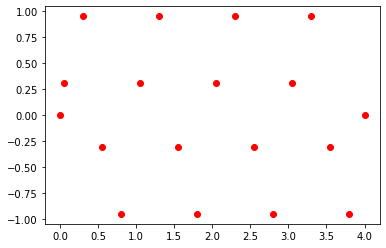

In [2]:
fun = lambda x: np.sin(2*np.pi*x)

N_POINTS = 480
STEP_SIZE = 30
t = np.linspace(0, 4, N_POINTS+1)
t_sampled = np.concatenate([t[:1], t[np.random.randint(2, STEP_SIZE):N_POINTS-1:STEP_SIZE], t[-1:]])
y_sampled = fun(t_sampled)
#y_sampled[-1] = y_sampled[0]

plt.plot(t_sampled, y_sampled, "ro")
plt.show()

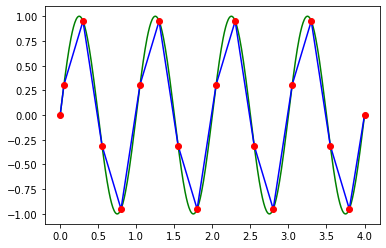

In [4]:
fun_ip = ip.interp1d(t_sampled, y_sampled, kind="linear")

plt.plot(t, fun(t), "g")
plt.plot(t, fun_ip(t), "b")
plt.plot(t_sampled, y_sampled, "ro")
plt.show()

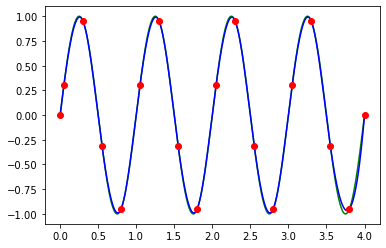

In [5]:
fun_ip = ip.interp1d(t_sampled, y_sampled, kind="cubic")

plt.plot(t, fun(t), "g")
plt.plot(t, fun_ip(t), "b")
plt.plot(t_sampled, y_sampled, "ro")
plt.show()

## Interpolação N-dimensional

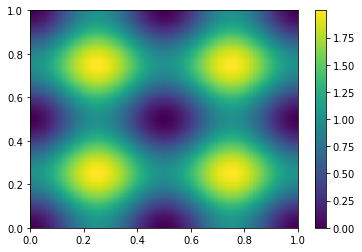

In [26]:
def f0(x, y):
    return np.sin(2*np.pi*x)**2 + np.sin(2*np.pi*y)**2

grid_xn, grid_yn = np.mgrid[0:1:200j, 0:1:200j]
xn = grid_xn[:,0]
yn = grid_yn[0,:]
z0 = f0(grid_xn, grid_yn)

plt.pcolor(grid_xn, grid_yn, z0)
plt.colorbar()
plt.show()

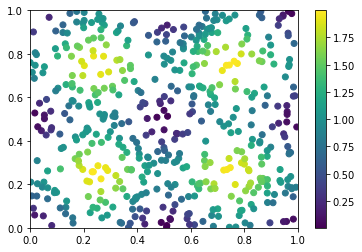

In [27]:
points = np.random.rand(500, 2)
values = f0(points[:, 0], points[:, 1])

plt.scatter(points[:, 0], points[:, 1], c=values)
plt.colorbar()
plt.axis([0,1,0,1])
plt.show()

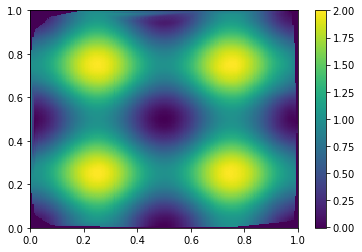

In [28]:
zn = ip.griddata(points, values, (grid_xn, grid_yn), fill_value=0, method='cubic')

plt.pcolor(grid_xn, grid_yn, zn)
plt.colorbar()
plt.show()

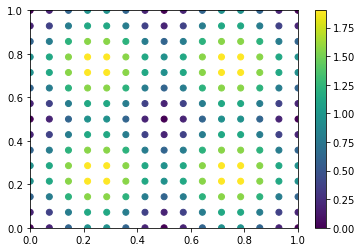

In [31]:
grid_x, grid_y = np.mgrid[0:1:15j, 0:1:15j]
z = f0(grid_x, grid_y)

plt.scatter(grid_x, grid_y, c=z)
plt.axis([0,1,0,1])
plt.colorbar()
plt.show()

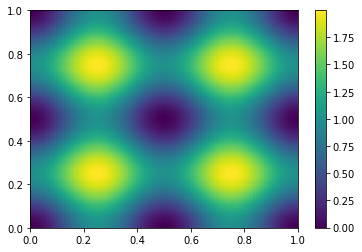

In [32]:
x = grid_x[:, 0]
y = grid_y[0, :]
spline = ip.RectBivariateSpline(x, y, z, s=0, kx=3, ky=3)
zn = spline(xn, yn)

plt.pcolor(grid_xn, grid_yn, zn)
plt.colorbar()
plt.show()